In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 4

###### <pre> trend of the skills throughout the year for data analyst job

###### solution

In [3]:
df_4 = df.copy()
df_4 = df_4[df_4['job']== 'Data Analyst'].explode('skills')
top5skills = df_4['skills'].value_counts().head(5).index.to_list()
df_4['posted_mo']  = df_4['posted_dt'].dt.month
df_4 = df_4.pivot_table(index='posted_mo', columns='skills', aggfunc='size')
df_4 = df_4[top5skills]

df_4

skills,sql,excel,python,tableau,power bi
posted_mo,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0
2,7947.0,5772.0,4751.0,3936.0,3307.0
3,7868.0,5675.0,4741.0,4051.0,3176.0
4,7553.0,5496.0,4557.0,3776.0,3106.0
5,6617.0,4773.0,4070.0,3245.0,2695.0
6,7584.0,5724.0,4707.0,3812.0,3275.0
7,7687.0,5513.0,4831.0,3928.0,3350.0
8,8823.0,6482.0,5576.0,4533.0,3859.0
9,6829.0,4886.0,4229.0,3446.0,3118.0


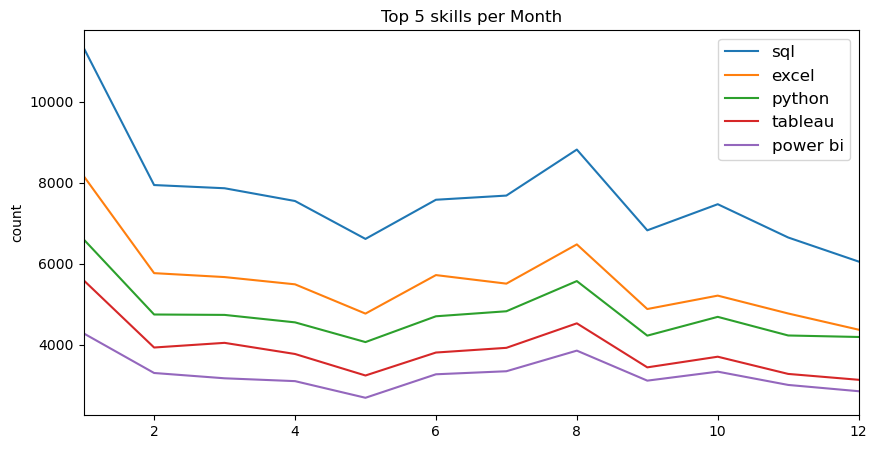

In [4]:
df_4.plot(kind='line',figsize=(10,5))
plt.title('Top 5 skills per Month')
plt.xlabel('')
plt.ylabel('count')
plt.xlim(1,12)
plt.legend(fontsize = 12)
plt.show()
# refer to _______ for converting x axis to jan,feb, mar etc